In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install kagglehub


In [3]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("shahzadahmad0402/depression-and-anxiety-data")
files = os.listdir(path)
csv_file = [f for f in files if f.endswith(".csv")][0]

df = pd.read_csv(os.path.join(path, csv_file))
df.head()


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 12.7k/12.7k [00:00<00:00, 2.15MB/s]

Extracting files...


,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [4]:
print(df.describe())

               id  school_year         age         bmi   phq_score  \
count  783.000000   783.000000  783.000000  783.000000  783.000000   
mean   392.000000     2.277139   20.233716   23.420533    7.123883   
std    226.176922     1.163633    1.767217    4.563630    4.426580   
min      1.000000     1.000000   18.000000    0.000000    0.000000   
25%    196.500000     1.000000   19.000000   20.989420    4.000000   
50%    392.000000     2.000000   20.000000   23.140496    6.000000   
75%    587.500000     3.000000   21.000000   25.519924    9.000000   
max    783.000000     4.000000   31.000000   54.552668   24.000000   

        gad_score  epworth_score  
count  783.000000     775.000000  
mean     6.810983       6.376774  
std      4.727352       3.996443  
min      0.000000       0.000000  
25%      3.000000       3.500000  
50%      6.000000       6.000000  
75%      9.000000       9.000000  
max     21.000000      32.000000  


In [5]:
print(set(df['who_bmi']))

{'Class I Obesity', 'Overweight', 'Underweight', 'Class III Obesity', 'Class II Obesity', 'Normal', 'Not Availble'}


In [6]:
print((df['depression_severity'].value_counts()))

depression_severity
Mild                 344
None-minimal         226
Moderate             140
Moderately severe     42
none                  15
Severe                12
Name: count, dtype: int64


In [7]:
df.isna().sum()


id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [8]:
df=df.dropna()


In [9]:
df.isna().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

gender = LabelEncoder()
who_bmi= LabelEncoder()

suicidal= LabelEncoder()
depression_diagnosis = LabelEncoder()
depression_treatment = LabelEncoder()

anxiousness= LabelEncoder()
anxiety_diagnosis= LabelEncoder()
anxiety_treatment= LabelEncoder()
sleepiness= LabelEncoder()
df['gender'] = gender.fit_transform(df['gender'])
df['depression_severity'] = df['depression_severity'].map({
    'None-minimal': 0,
    'none': 0,
    'Mild': 1,
    'Moderate': 2,
    'Moderately severe': 3,
    'Severe': 4
})
df['suicidal'] = suicidal.fit_transform(df['suicidal'])
df['depression_diagnosis'] = depression_diagnosis.fit_transform(df['depression_diagnosis'])
df['depression_treatment'] = depression_treatment.fit_transform(df['depression_treatment'])
df['anxiety_severity'] = df['anxiety_severity'].map({
    'None-minimal': 0,
    '0': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
})

df['anxiousness'] = anxiousness.fit_transform(df['anxiousness'])
df['anxiety_diagnosis'] = anxiety_diagnosis.fit_transform(df['anxiety_diagnosis'])
df['anxiety_treatment'] = anxiety_treatment.fit_transform(df['anxiety_treatment'])
df['sleepiness'] = sleepiness.fit_transform(df['sleepiness'])

In [11]:
df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,1,33.333333,Class I Obesity,9,1,False,0,0,0,11,2,1,0,0,7.0,0
1,2,1,18,1,19.841270,Normal,8,1,False,0,0,0,5,1,0,0,0,14.0,1
2,3,1,19,1,25.102391,Overweight,8,1,False,0,0,0,6,1,0,0,0,6.0,0
3,4,1,18,0,23.738662,Normal,19,3,True,1,0,0,15,3,1,0,0,11.0,1
4,5,1,18,1,25.617284,Overweight,6,1,False,0,0,0,14,2,1,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,0,21.096191,Normal,6,1,False,0,0,0,1,0,0,0,0,3.0,0
779,780,4,22,1,25.308642,Overweight,4,0,False,0,0,0,6,1,0,0,0,3.0,0
780,781,4,22,1,22.720438,Normal,2,0,False,0,0,0,5,1,0,0,0,4.0,0
781,782,4,22,0,23.033168,Normal,17,3,True,0,0,0,19,3,1,0,0,15.0,1


In [12]:
df=df.drop('phq_score', axis=1)

In [13]:
df=df.drop('gad_score', axis=1)

In [14]:
df=df.drop('epworth_score', axis=1)

In [15]:
df=df.drop("who_bmi", axis=1)

In [16]:
df=df.drop("id",axis=1)

In [17]:
df

,school_year,age,gender,bmi,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
0,1,19,1,33.333333,1,False,0,0,0,2,1,0,0,0
1,1,18,1,19.841270,1,False,0,0,0,1,0,0,0,1
2,1,19,1,25.102391,1,False,0,0,0,1,0,0,0,0
3,1,18,0,23.738662,3,True,1,0,0,3,1,0,0,1
4,1,18,1,25.617284,1,False,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,4,24,0,21.096191,1,False,0,0,0,0,0,0,0,0
779,4,22,1,25.308642,0,False,0,0,0,1,0,0,0,0
780,4,22,1,22.720438,0,False,0,0,0,1,0,0,0,0
781,4,22,0,23.033168,3,True,0,0,0,3,1,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df['age']=st.fit_transform(df[['age']])
b=StandardScaler()
df['bmi']=b.fit_transform(df[['bmi']])


In [19]:
depressiveness=LabelEncoder()
df['depressiveness']=depressiveness.fit_transform(df['depressiveness'])

df

,school_year,age,gender,bmi,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
0,1,-0.709928,1,2.163153,1,0,0,0,0,2,1,0,0,0
1,1,-1.274476,1,-0.778087,1,0,0,0,0,1,0,0,0,1
2,1,-0.709928,1,0.368826,1,0,0,0,0,1,0,0,0,0
3,1,-1.274476,0,0.071536,3,1,1,0,0,3,1,0,0,1
4,1,-1.274476,1,0.481072,1,0,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,4,2.112811,0,-0.504517,1,0,0,0,0,0,0,0,0,0
779,4,0.983715,1,0.413788,0,0,0,0,0,1,0,0,0,0
780,4,0.983715,1,-0.150434,0,0,0,0,0,1,0,0,0,0
781,4,0.983715,0,-0.082260,3,1,0,0,0,3,1,0,0,1


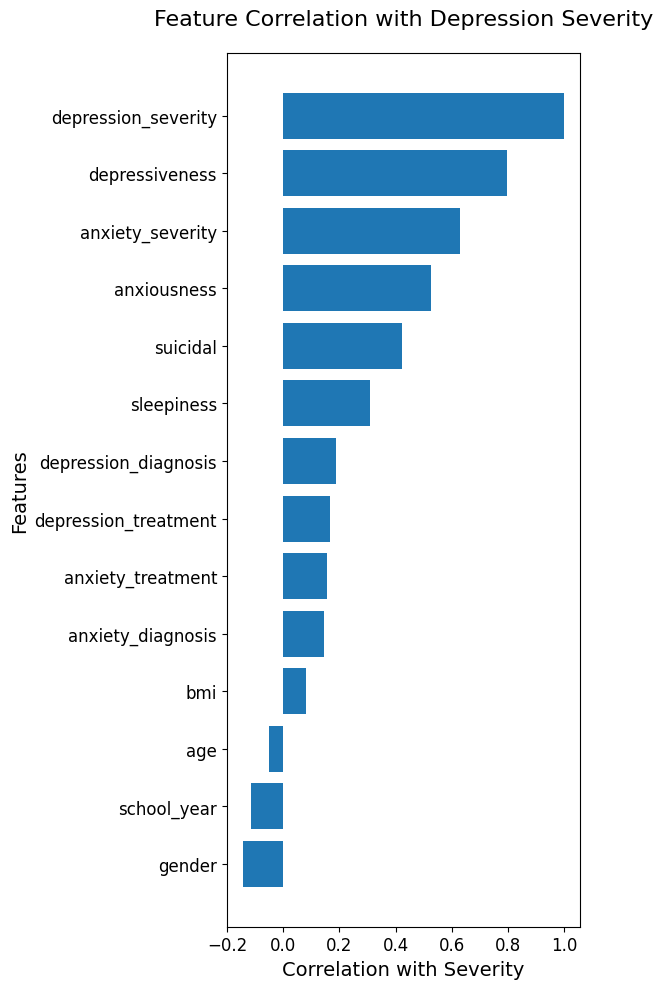

In [20]:
import matplotlib.pyplot as plt

corr = df.corr()["depression_severity"].sort_values()

plt.figure(figsize=(6,10))  # tall so labels spread out
plt.barh(corr.index, corr.values)
plt.xlabel("Correlation with Severity", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Correlation with Depression Severity", fontsize=16, pad=20)
plt.yticks(fontsize=12)  # big labels
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

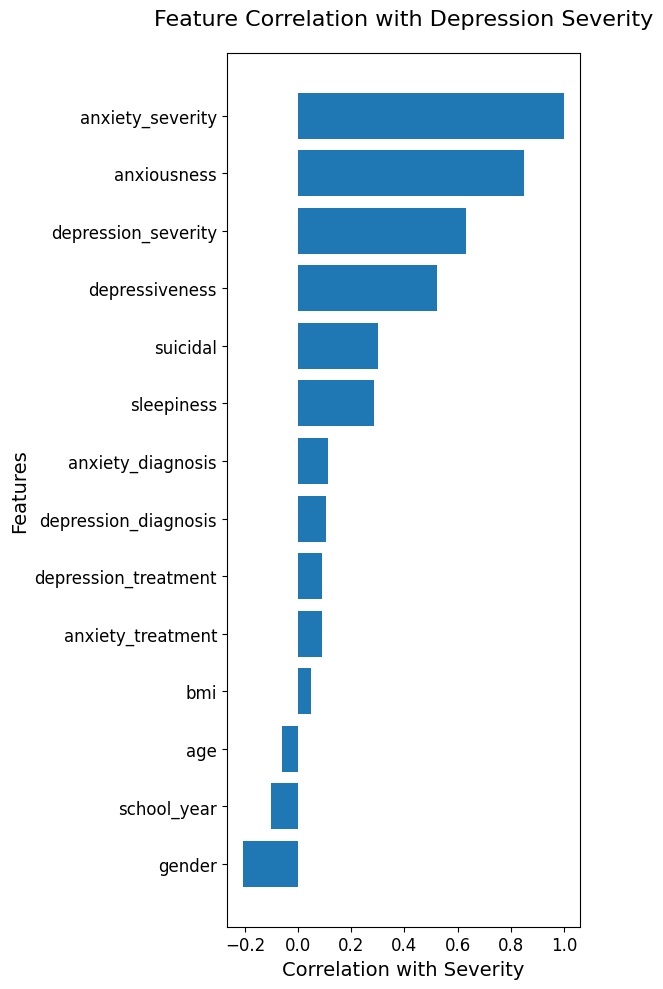

In [21]:
import matplotlib.pyplot as plt

corr = df.corr()["anxiety_severity"].sort_values()

plt.figure(figsize=(6,10))  # tall so labels spread out
plt.barh(corr.index, corr.values)
plt.xlabel("Correlation with Severity", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Correlation with Depression Severity", fontsize=16, pad=20)
plt.yticks(fontsize=12)  # big labels
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

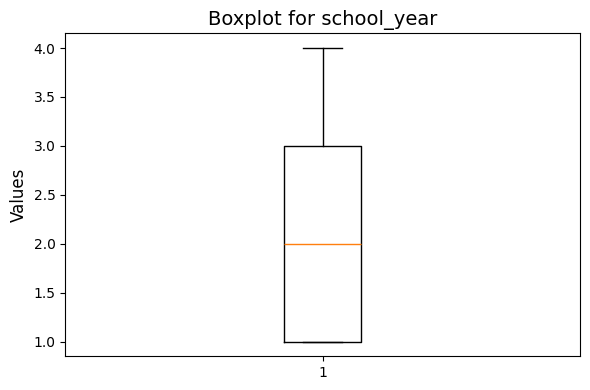

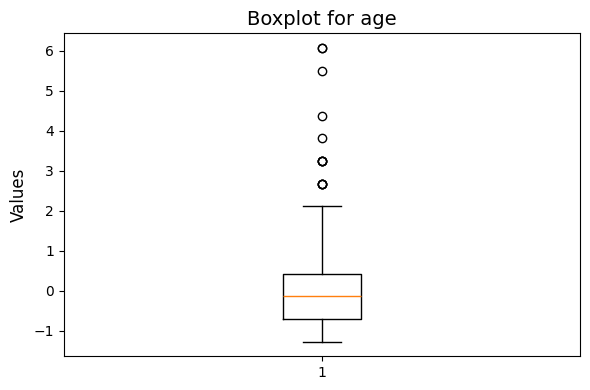

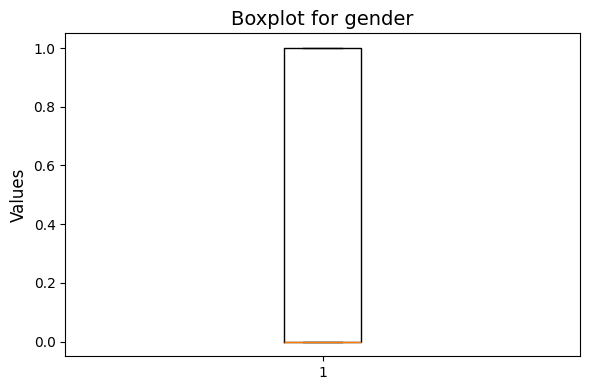

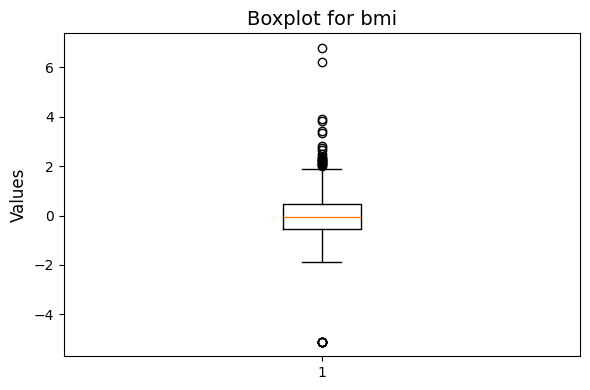

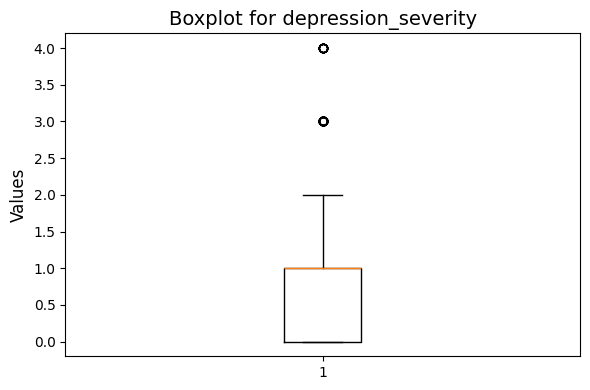

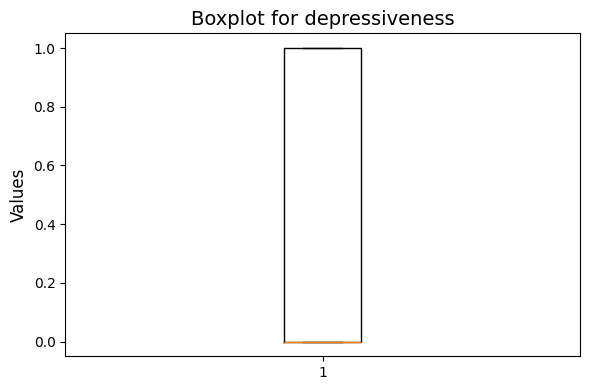

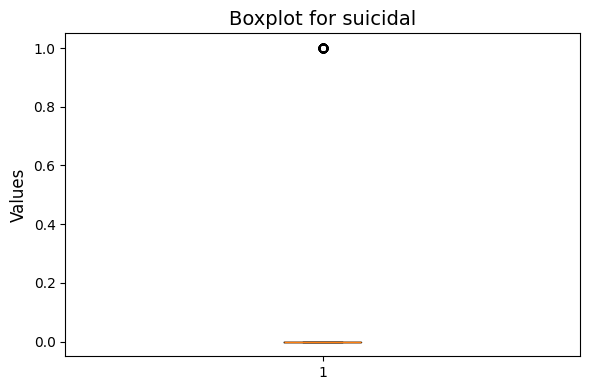

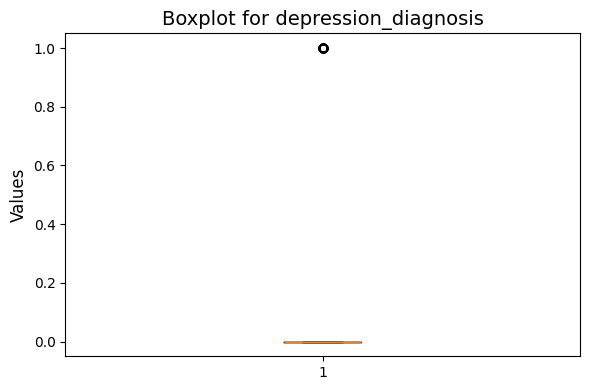

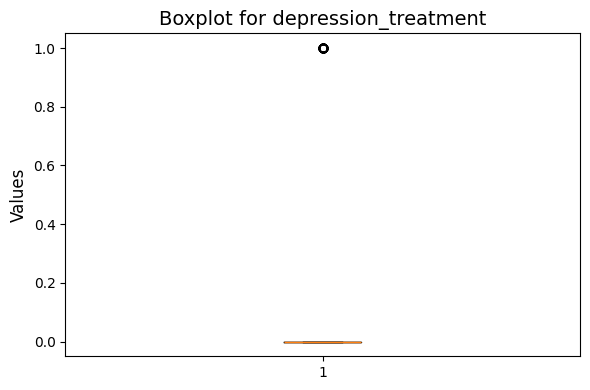

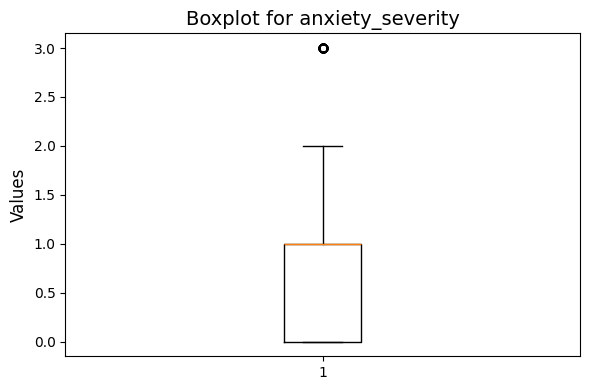

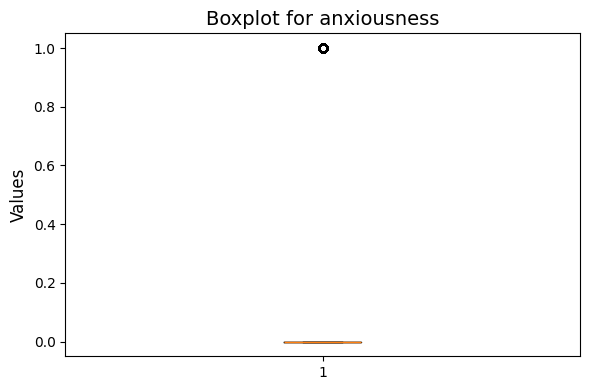

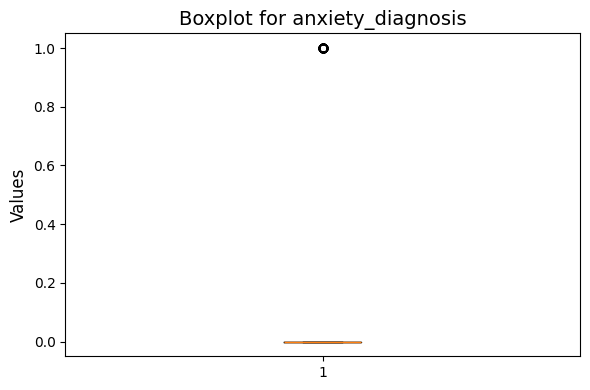

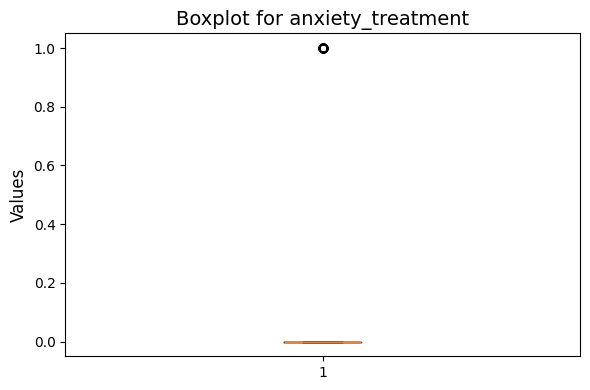

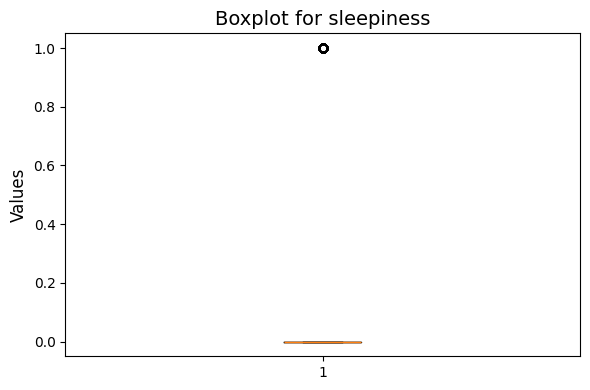

In [22]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col])
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.ylabel("Values", fontsize=12)
    plt.tight_layout()
    plt.show()


In [23]:
depression_df=df.drop('anxiety_severity', axis=1)
depression_df=df.drop('anxiety_diagnosis', axis=1)
depression_df=df.drop('bmi', axis=1)
anxiety_df=df.drop('depression_severity', axis=1)
anxiety_df=df.drop('depression_diagnosis', axis=1)

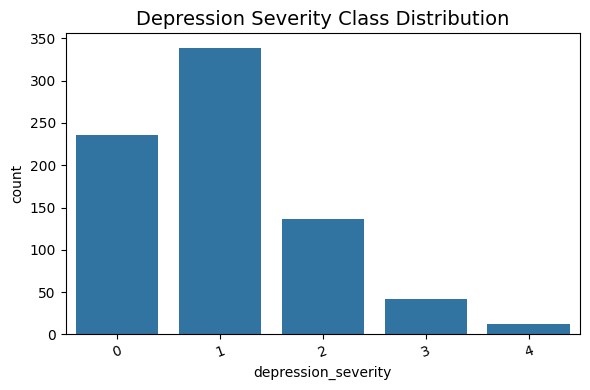

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["depression_severity"])
plt.title("Depression Severity Class Distribution", fontsize=14)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


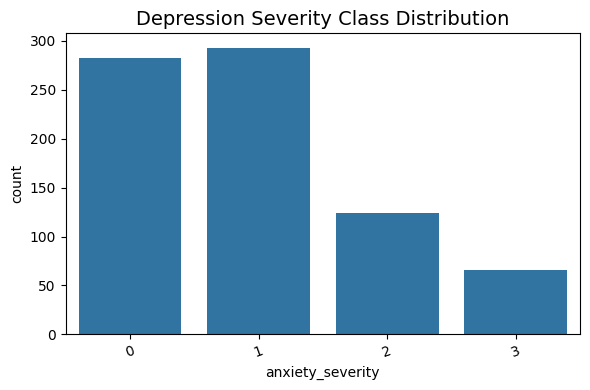

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["anxiety_severity"])
plt.title("Depression Severity Class Distribution", fontsize=14)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


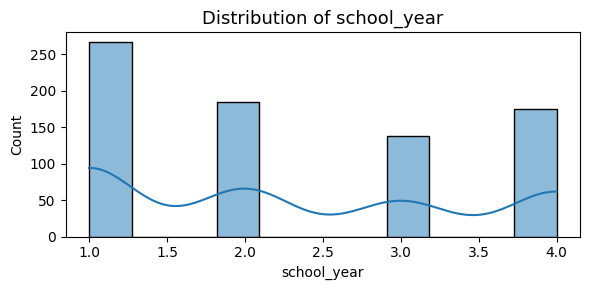

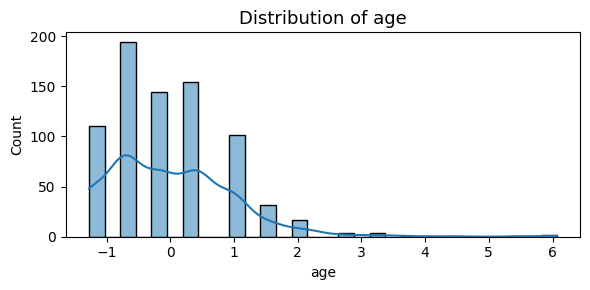

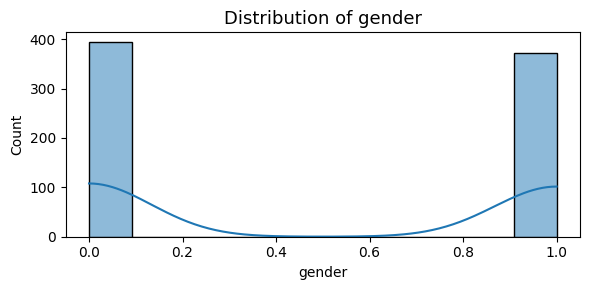

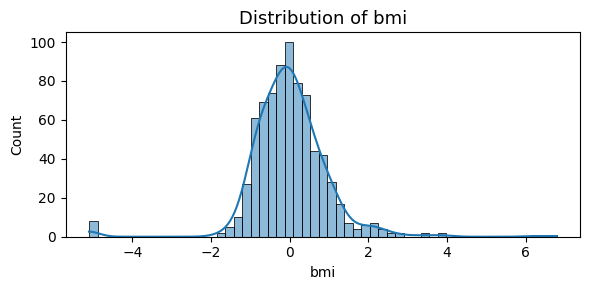

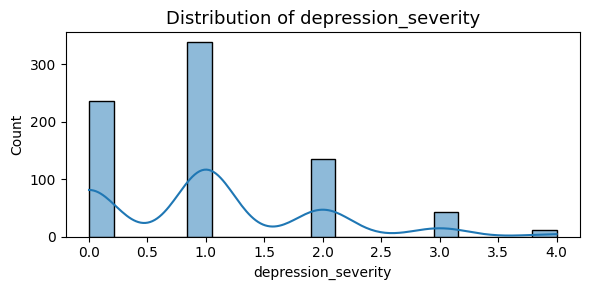

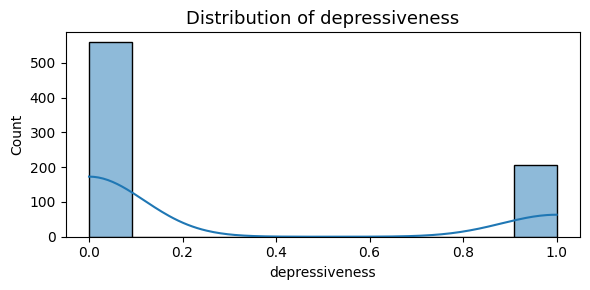

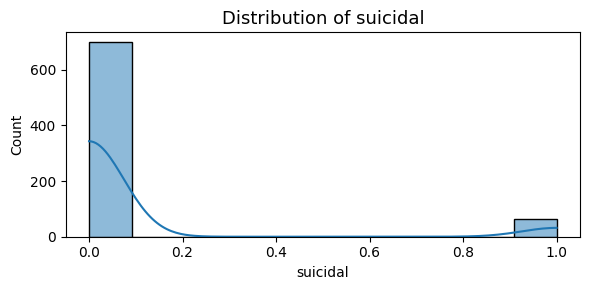

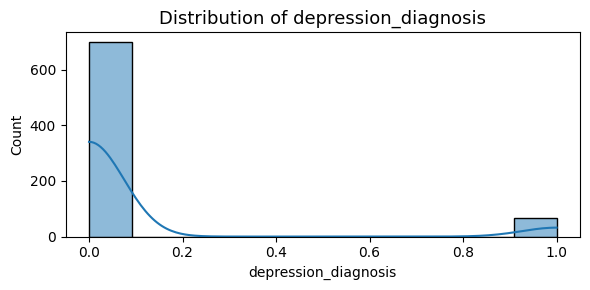

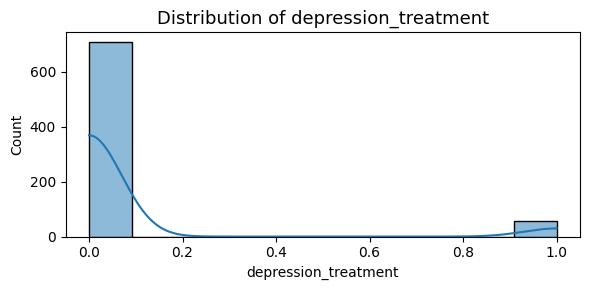

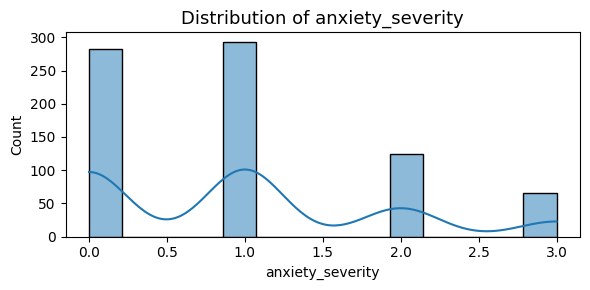

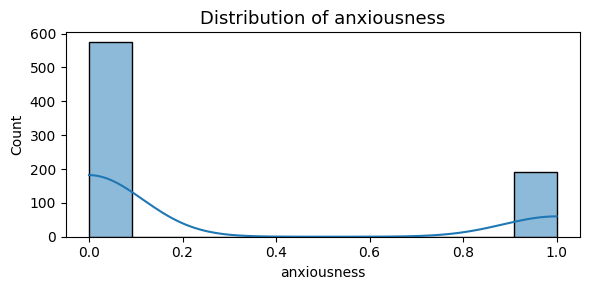

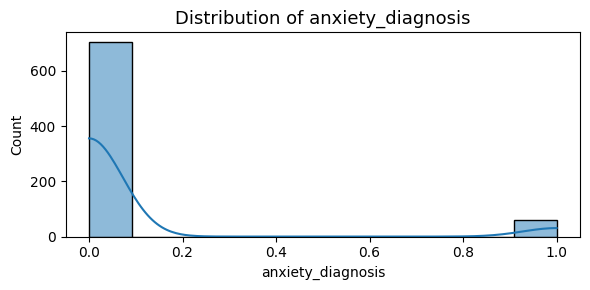

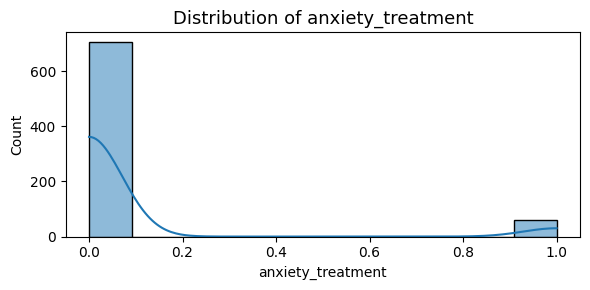

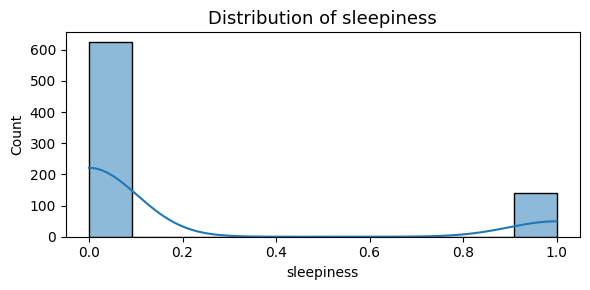

In [26]:
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.tight_layout()
    plt.show()


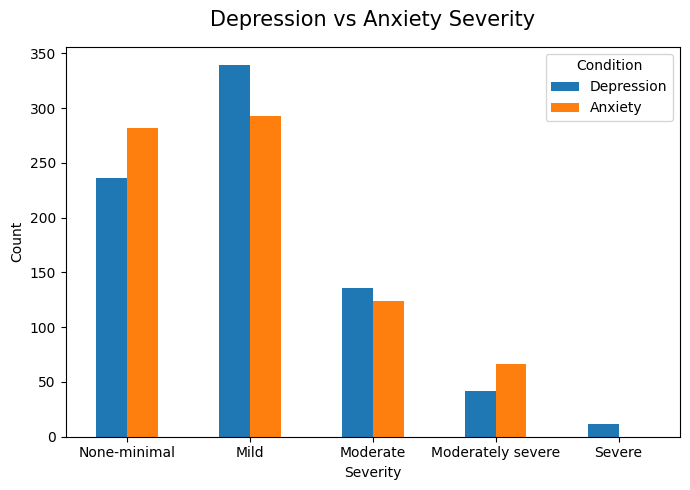

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


severity_order = [0, 1, 2, 3, 4]

viz_data = pd.DataFrame({
    "Depression": df["depression_severity"].value_counts().reindex(severity_order, fill_value=0),
    "Anxiety": df["anxiety_severity"].value_counts().reindex(severity_order, fill_value=0)
})

plt.figure(figsize=(7, 5))
ax = viz_data.plot(kind="bar", ax=plt.gca())

plt.title("Depression vs Anxiety Severity", fontsize=15, pad=15)
plt.xlabel("Severity")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Replace x-tick labels with meaningful names
severity_labels = ["None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"]
ax.set_xticklabels(severity_labels)

plt.legend(title="Condition")
plt.tight_layout()
plt.show()


(Moderately severe and Moderate are combined for this) It is more likely for someone to have both conditions

C:\Users\aadar\AppData\Local\Temp\ipykernel_13208\1131577740.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df.groupby("_age_range")["depression_severity"]


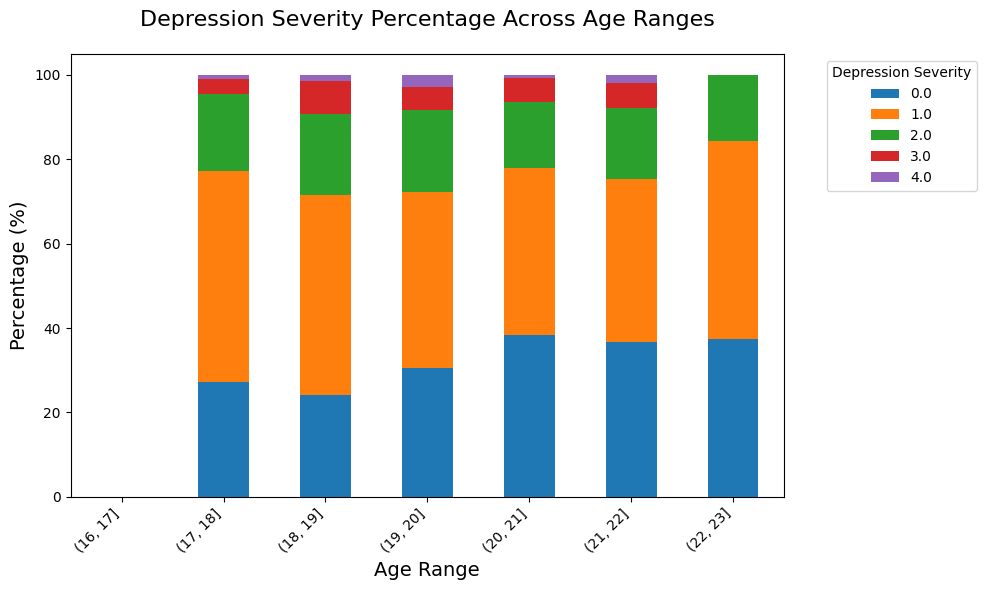

C:\Users\aadar\AppData\Local\Temp\ipykernel_13208\1131577740.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df.groupby("_age_range")["anxiety_severity"]


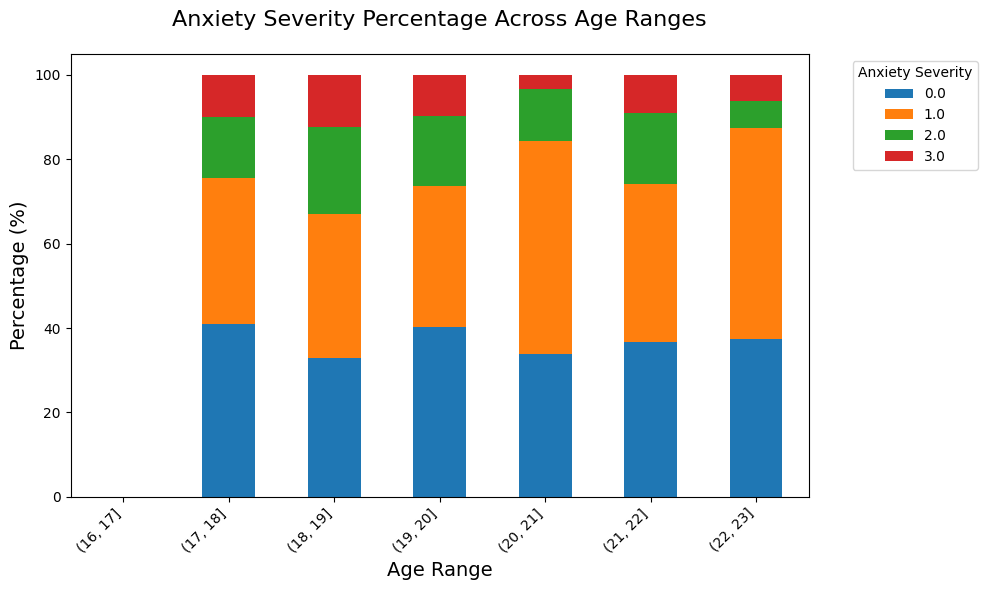

In [28]:
new_df = pd.read_csv(os.path.join(path, csv_file))
new_df["depression_severity"]=df["depression_severity"]
new_df["anxiety_severity"]=df["anxiety_severity"]


new_df["_age_range"] = pd.cut(new_df["age"], bins=[16, 17,18,19,20,21,22,23])

severity_percent = (
    new_df.groupby("_age_range")["depression_severity"]
      .value_counts(normalize=True)
      .mul(100)
      .unstack()
      .round(2)
      .fillna(0)
)


# Create a stacked bar chart
severity_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Depression Severity Percentage Across Age Ranges', fontsize=16, pad=20)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Depression Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

severity_percent = (
    new_df.groupby("_age_range")["anxiety_severity"]
      .value_counts(normalize=True)
      .mul(100)
      .unstack()
      .round(2)
      .fillna(0)
)


# Create a stacked bar chart
severity_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Anxiety Severity Percentage Across Age Ranges', fontsize=16, pad=20)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Anxiety Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

new_df.drop(columns=["_age_range"], inplace=True)



Depression severity seems to increase by a bit but eventually reduce as for increase in age while anxiety seems persistent

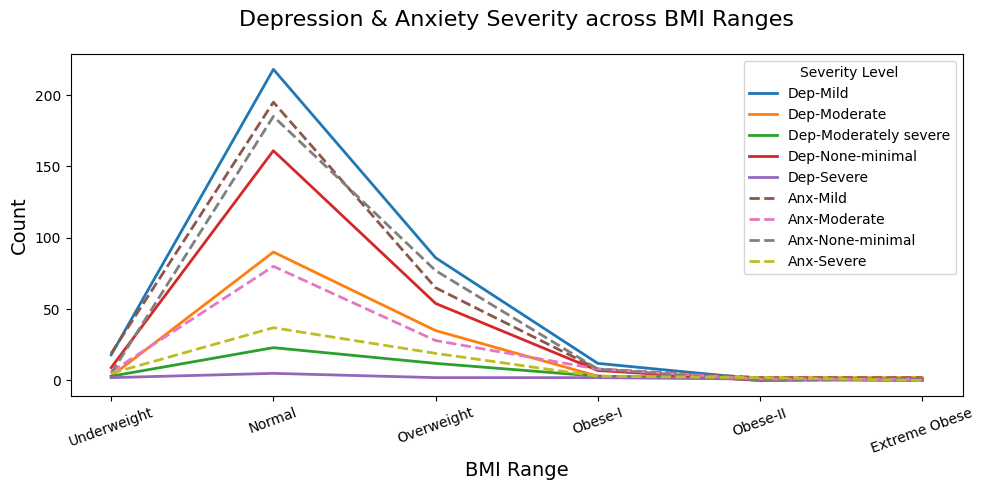

In [29]:

depression_severity_reverse_map = {
    0: 'None-minimal',
    1: 'Mild',
    2: 'Moderate',
    3: 'Moderately severe',
    4: 'Severe'
}

anxiety_severity_reverse_map = {
    0: 'None-minimal',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe'
}

original_data_full = pd.read_csv(os.path.join(path, csv_file))
original_data_filtered = original_data_full.loc[df.index]

dep_labels = df["depression_severity"].map(depression_severity_reverse_map)
anx_labels = df["anxiety_severity"].map(anxiety_severity_reverse_map)

bmi_bins = [0, 18.5, 25, 30, 35, 40, 60]
bmi_ranges = ["Underweight", "Normal", "Overweight", "Obese-I", "Obese-II", "Extreme Obese"]

bmi_bucket = pd.cut(original_data_filtered["bmi"], bins=bmi_bins, labels=bmi_ranges)


dep_labels.name = "depression_severity_label"
anx_labels.name = "anxiety_severity_label"

dep_trend = pd.DataFrame(dep_labels).groupby(bmi_bucket, observed=False)["depression_severity_label"].value_counts().unstack().fillna(0)
anx_trend = pd.DataFrame(anx_labels).groupby(bmi_bucket, observed=False)["anxiety_severity_label"].value_counts().unstack().fillna(0)

plt.figure(figsize=(10,5))

for sev in dep_trend.columns:
    plt.plot(dep_trend.index.astype(str), dep_trend[sev], label=f"Dep-{sev}", linewidth=2)

for sev in anx_trend.columns:
    plt.plot(anx_trend.index.astype(str), anx_trend[sev], label=f"Anx-{sev}", linestyle="dashed", linewidth=2)

plt.title("Depression & Anxiety Severity across BMI Ranges", fontsize=16, pad=20)
plt.xlabel("BMI Range", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=20)
plt.legend(title="Severity Level")
plt.tight_layout()
plt.show()


This might be a bit biased as most of our data is normal

# Modle Training (depression)

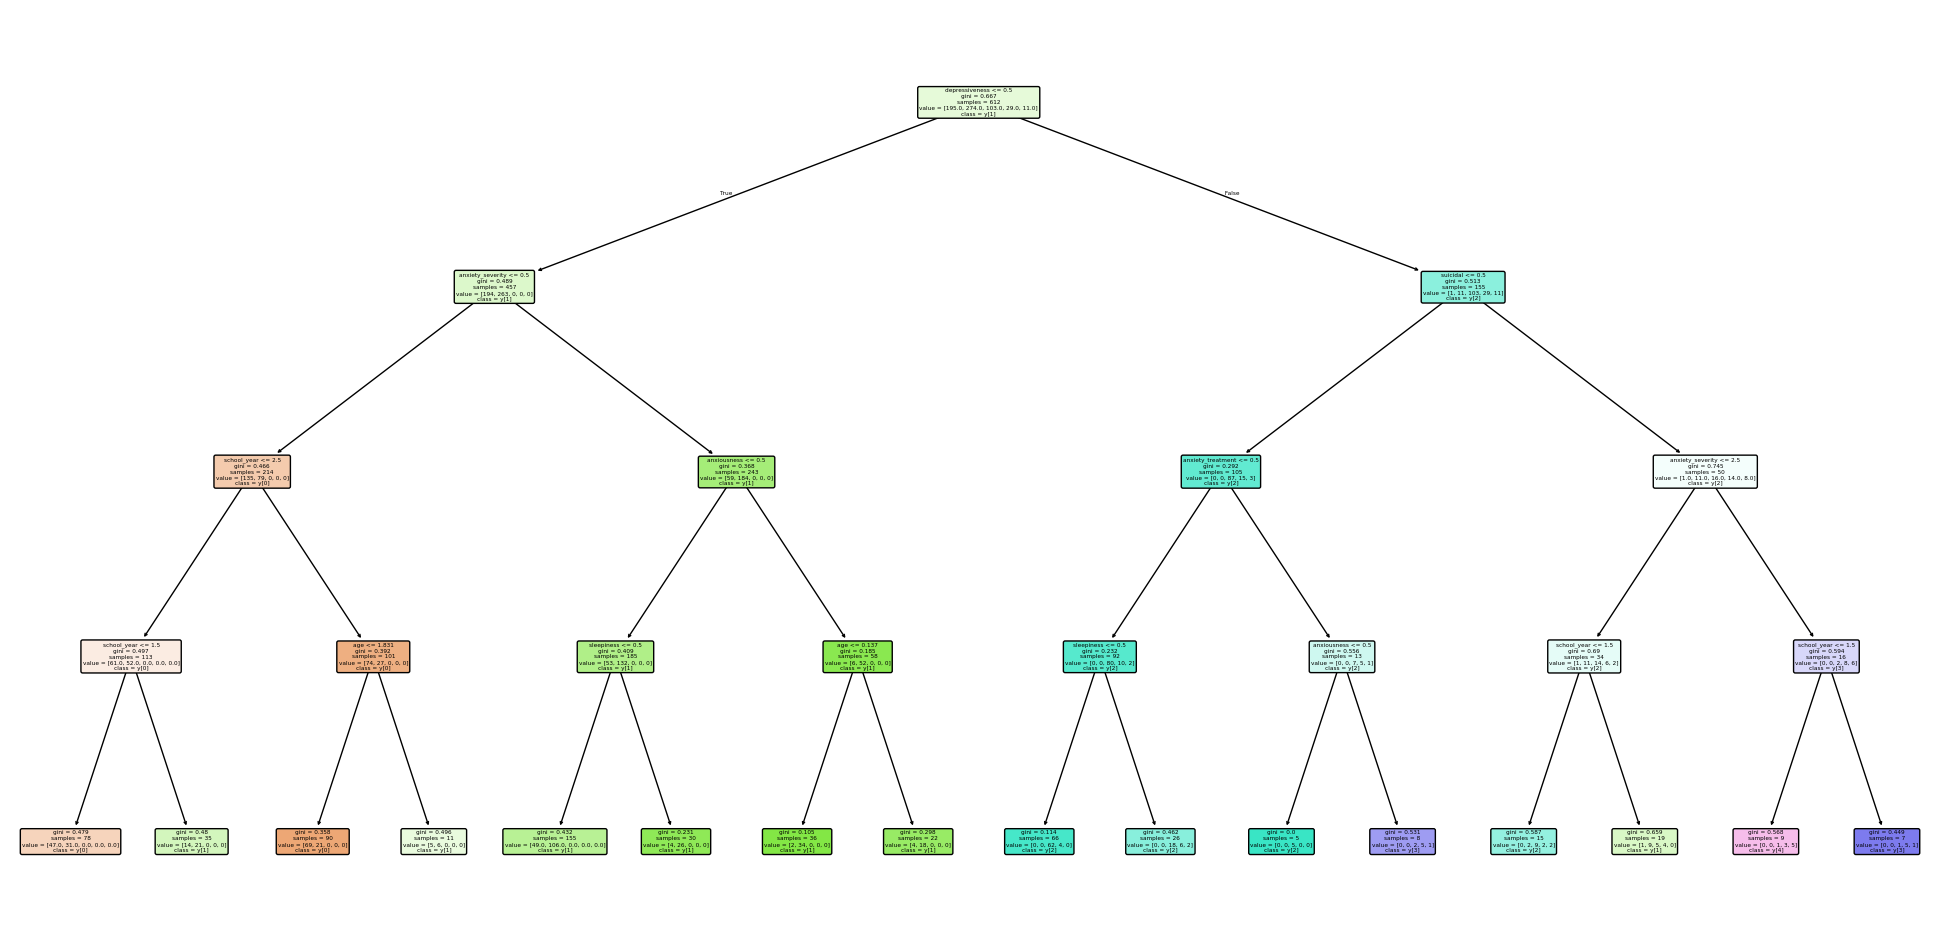

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(depression_df.drop('depression_severity', axis=1), depression_df['depression_severity'], test_size=0.2)


model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

plt.figure(figsize=(25, 12))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=True,
    filled=True,
    rounded=True
)
plt.show()


the values

Accuracy: 0.7255

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        41
           1       0.71      0.80      0.75        65
           2       0.80      0.85      0.82        33
           3       1.00      0.38      0.56        13
           4       0.00      0.00      0.00         1

    accuracy                           0.73       153
   macro avg       0.64      0.53      0.56       153
weighted avg       0.74      0.73      0.72       153



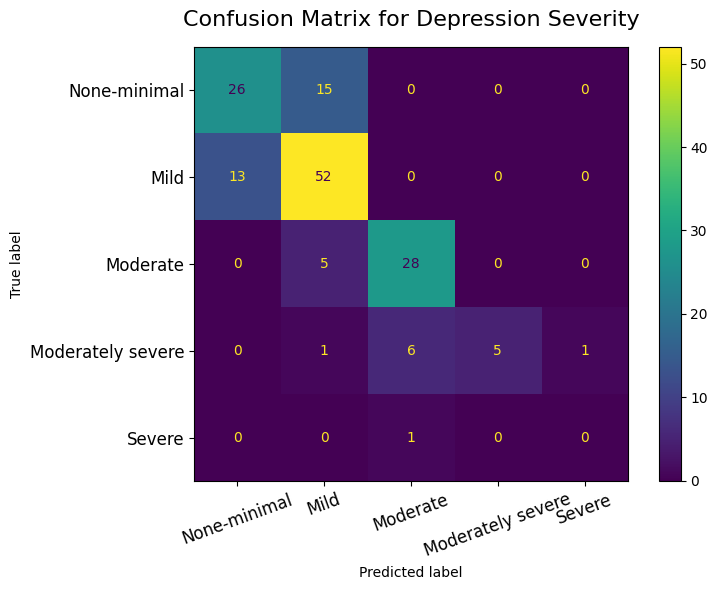

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"
])
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Depression Severity", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

model = grid_search.best_estimator_
print("Model updated with the best hyperparameters from Grid Search.")

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best Parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
Best Cross-validation Accuracy: 0.7125
Model updated with the best hyperparameters from Grid Search.


Accuracy of Optimized DT: 0.6993

Classification Report for DT:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        41
           1       0.71      0.82      0.76        65
           2       0.74      0.79      0.76        33
           3       0.60      0.23      0.33        13
           4       0.00      0.00      0.00         1

    accuracy                           0.70       153
   macro avg       0.55      0.49      0.50       153
weighted avg       0.69      0.70      0.69       153



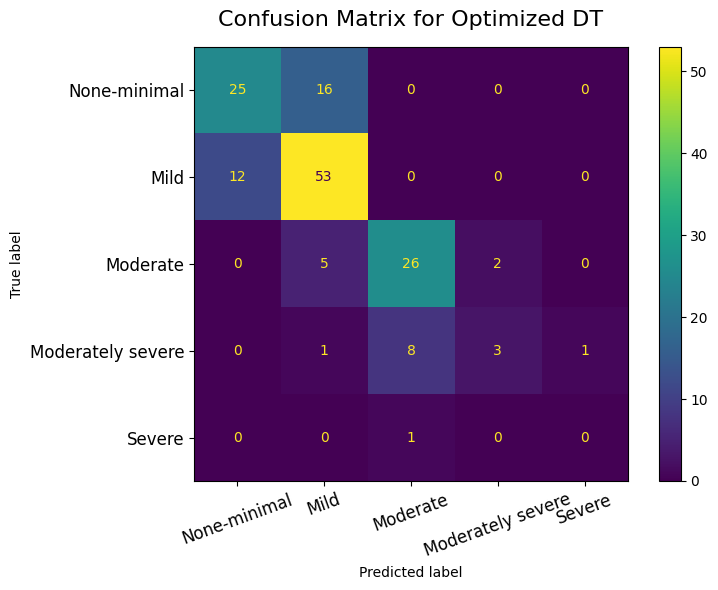

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_optimized = model.predict(X_test)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy of Optimized DT: {accuracy_optimized:.4f}")

print("\nClassification Report for DT:")
print(classification_report(y_test, y_pred_optimized))

class_labels = ["None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"]

cm_optimized = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Optimized DT", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


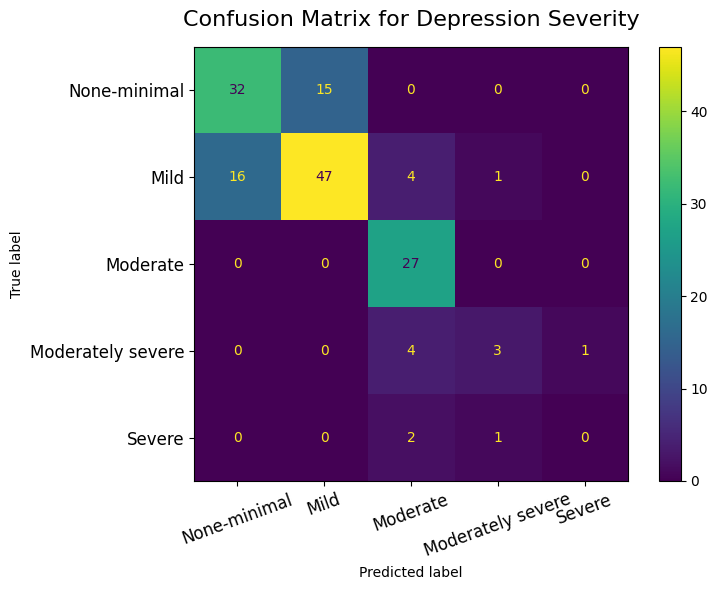

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


X = depression_df.drop(columns=["depression_severity"])
y = depression_df["depression_severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_multi = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
log_multi.fit(X_train, y_train)

y_pred = log_multi.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # bigger display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"
])
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Depression Severity", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}

lr_model = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=42
)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train, y_train)

print(f"Best Parameters found for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best Cross-validation Accuracy for Logistic Regression: {grid_search_lr.best_score_:.4f}")

best_lr_model = grid_search_lr.best_estimator_
print("Logistic Regression model updated with the best hyperparameters from Grid Search.")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters found for Logistic Regression: {'C': 1, 'solver': 'saga'}
Best Cross-validation Accuracy for Logistic Regression: 0.6831
Logistic Regression model updated with the best hyperparameters from Grid Search.


C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Optimized Logistic Regression: 0.7124

Classification Report for Optimized Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67        47
           1       0.76      0.69      0.72        68
           2       0.73      1.00      0.84        27
           3       0.60      0.38      0.46         8
           4       0.00      0.00      0.00         3

    accuracy                           0.71       153
   macro avg       0.55      0.55      0.54       153
weighted avg       0.70      0.71      0.70       153



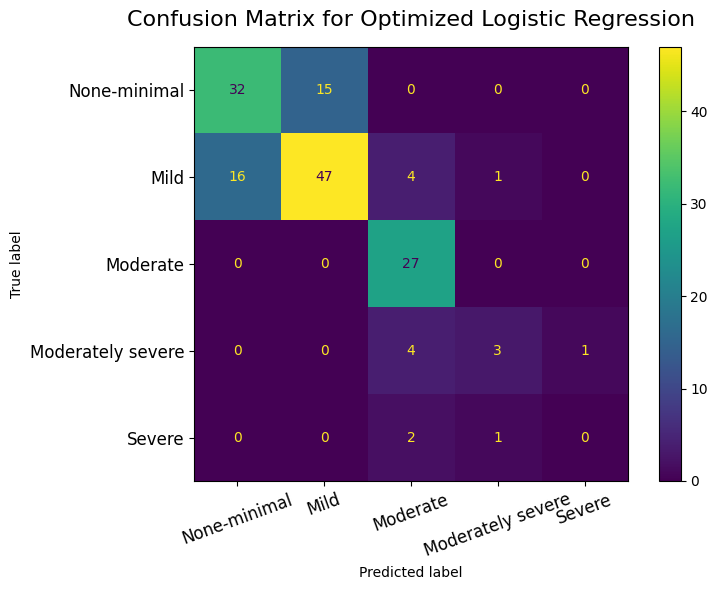

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_optimized = best_lr_model.predict(X_test)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy of Optimized Logistic Regression: {accuracy_optimized:.4f}")

print("\nClassification Report for Optimized Logistic Regression:")
print(classification_report(y_test, y_pred_optimized))

class_labels = ["None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"]

cm_optimized = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Optimized Logistic Regression", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


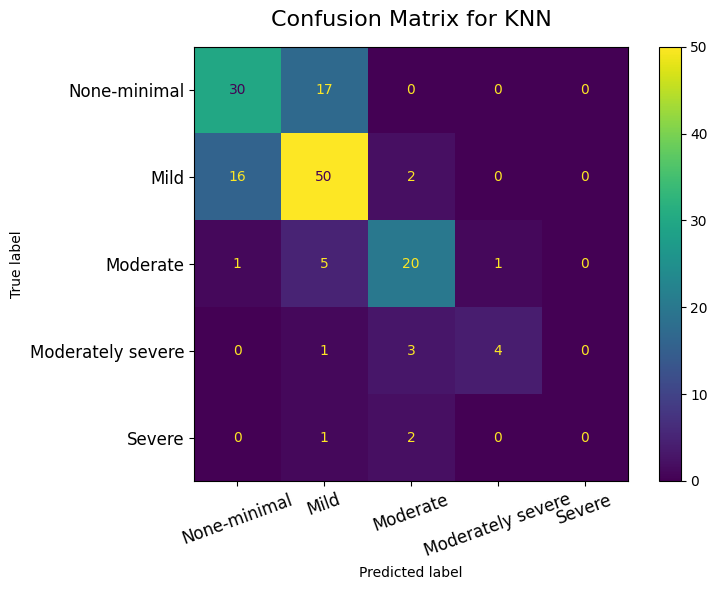

In [38]:
from sklearn.neighbors import KNeighborsClassifier
X = depression_df.drop(columns=["depression_severity"])
y = depression_df["depression_severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Knn_model=KNeighborsClassifier(
    n_neighbors=3
)
Knn_model.fit(X_train, y_train)
y_pred=Knn_model.predict(X_test)


cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(ax=plt.gca())
plt.title("Confusion Matrix for KNN", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn_model = KNeighborsClassifier()


grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search_knn.fit(X_train, y_train)

print(f"Best Parameters found for KNN: {grid_search_knn.best_params_}")
print(f"Best Cross-validation Accuracy for KNN: {grid_search_knn.best_score_:.4f}")


Knn_model = grid_search_knn.best_estimator_
print("KNN model updated with the best hyperparameters from Grid Search.")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters found for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Cross-validation Accuracy for KNN: 0.6732
KNN model updated with the best hyperparameters from Grid Search.


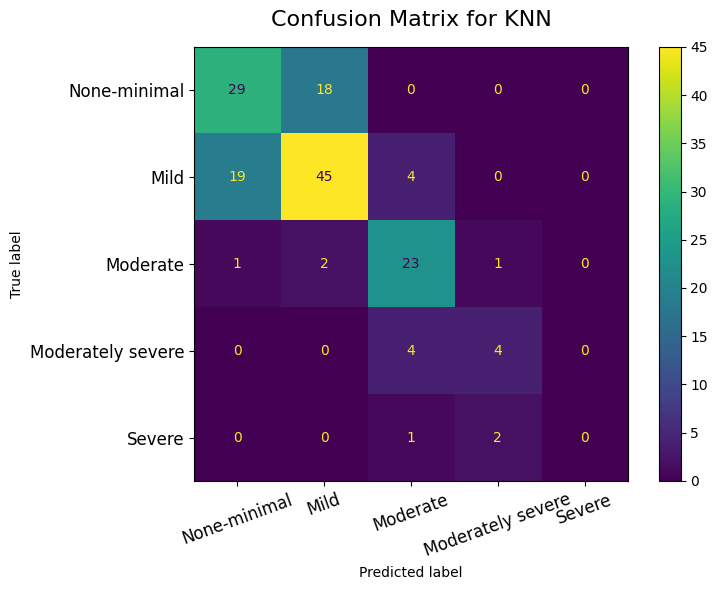

In [40]:
Knn_model.fit(X_train, y_train)
y_pred=Knn_model.predict(X_test)


cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(ax=plt.gca())
plt.title("Confusion Matrix for KNN", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


base_learners = [
    ("knn", Knn_model),
    ("lr", best_lr_model),
    ("tree", model)
]

meta_model = LogisticRegression(max_iter=1000)


stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5
)


ovr_stack = OneVsRestClassifier(stack)
ovr_stack.fit(X_train, y_train)

y_pred = ovr_stack.predict(X_test)


C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

In [42]:
from sklearn.model_selection import GridSearchCV

# (Make sure your stacking meta-model is logistic)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# define base learners if not already plugged
base_estimators = [
    ("knn", Knn_model),
    ("dt", model),
    ("lr", best_lr_model)
]

# Ensure final estimator is logistic
stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=2000, random_state=42),
    n_jobs=-1
)

# Grid space only for meta logistic
param_grid = {
    "final_estimator__C": [0.01, 0.1, 1, 10],
    "final_estimator__solver": ['lbfgs', 'saga']
}

stack_grid = GridSearchCV(
    estimator=stack,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

stack_grid.fit(X_train, y_train)

print("Best params for stack:", stack_grid.best_params_)
print("Best CV score:", stack_grid.best_score_)

# Best stacked model for later testing
best_stack = stack_grid.best_estimator_

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params for stack: {'final_estimator__C': 1, 'final_estimator__solver': 'lbfgs'}
Best CV score: 0.7026789284286286
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        47
           1       0.72      0.69      0.71        68
           2       0.73      1.00      0.84        27
           3       0.67      0.50      0.57         8
           4       0.00      0.00      0.00         3

    accuracy                           0.70       153
   macro avg       0.55      0.56      0.55       153
weighted avg       0.68      0.70      0.69       153



C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy of Stacked Classifier (OVR): 0.6993

Classification Report for Stacked Classifier (OVR):


C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.64      0.62      0.63        47
           1       0.72      0.69      0.71        68
           2       0.73      1.00      0.84        27
           3       0.67      0.50      0.57         8
           4       0.00      0.00      0.00         3

    accuracy                           0.70       153
   macro avg       0.55      0.56      0.55       153
weighted avg       0.68      0.70      0.69       153



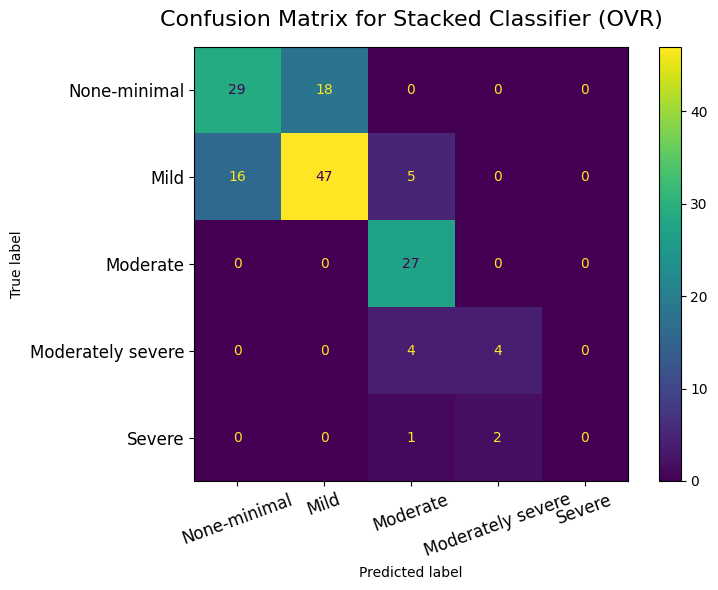

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_stacked = ovr_stack.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy of Stacked Classifier (OVR): {accuracy_stacked:.4f}")

print("\nClassification Report for Stacked Classifier (OVR):")
print(classification_report(y_test, y_pred_stacked))


class_labels = ["None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"]

cm_stacked = confusion_matrix(y_test, y_pred_stacked)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Stacked Classifier (OVR)", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Accuracy of Best Stack: 0.7059

Classification Report for Stacked Classifier (:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        47
           1       0.73      0.71      0.72        68
           2       0.71      1.00      0.83        27
           3       0.80      0.50      0.62         8
           4       0.00      0.00      0.00         3

    accuracy                           0.71       153
   macro avg       0.58      0.56      0.56       153
weighted avg       0.69      0.71      0.69       153



C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

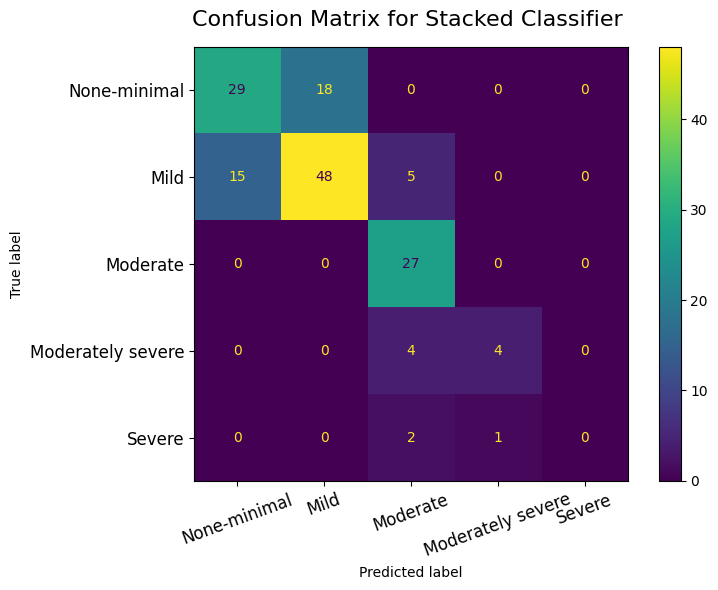

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_stacked = best_stack.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy of Best Stack: {accuracy_stacked:.4f}")

print("\nClassification Report for Stacked Classifier (:")
print(classification_report(y_test, y_pred_stacked))


class_labels = ["None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"]

cm_stacked = confusion_matrix(y_test, y_pred_stacked)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Stacked Classifier ", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Accuracy of Stacked Classifier (OVR): 0.6993

Classification Report for Stacked Classifier (OVR):
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        47
           1       0.72      0.69      0.71        68
           2       0.73      1.00      0.84        27
           3       0.67      0.50      0.57         8
           4       0.00      0.00      0.00         3

    accuracy                           0.70       153
   macro avg       0.55      0.56      0.55       153
weighted avg       0.68      0.70      0.69       153



C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

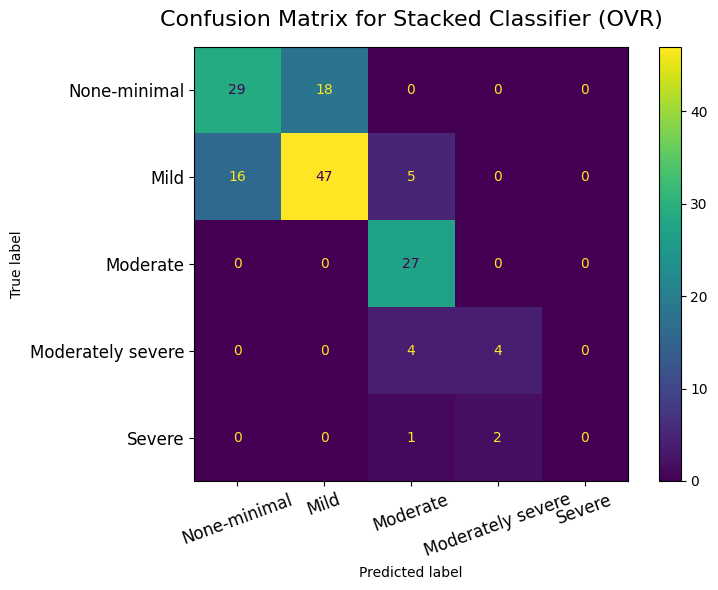

In [45]:
#OVR with Best stack
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ovr_stack = OneVsRestClassifier(best_stack)
ovr_stack.fit(X_train, y_train)



y_pred_stacked = ovr_stack.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy of Stacked Classifier (OVR): {accuracy_stacked:.4f}")

print("\nClassification Report for Stacked Classifier (OVR):")
print(classification_report(y_test, y_pred_stacked))


class_labels = ["None-minimal", "Mild", "Moderate", "Moderately severe", "Severe"]

cm_stacked = confusion_matrix(y_test, y_pred_stacked)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Stacked Classifier (OVR)", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Now Model for anxiety

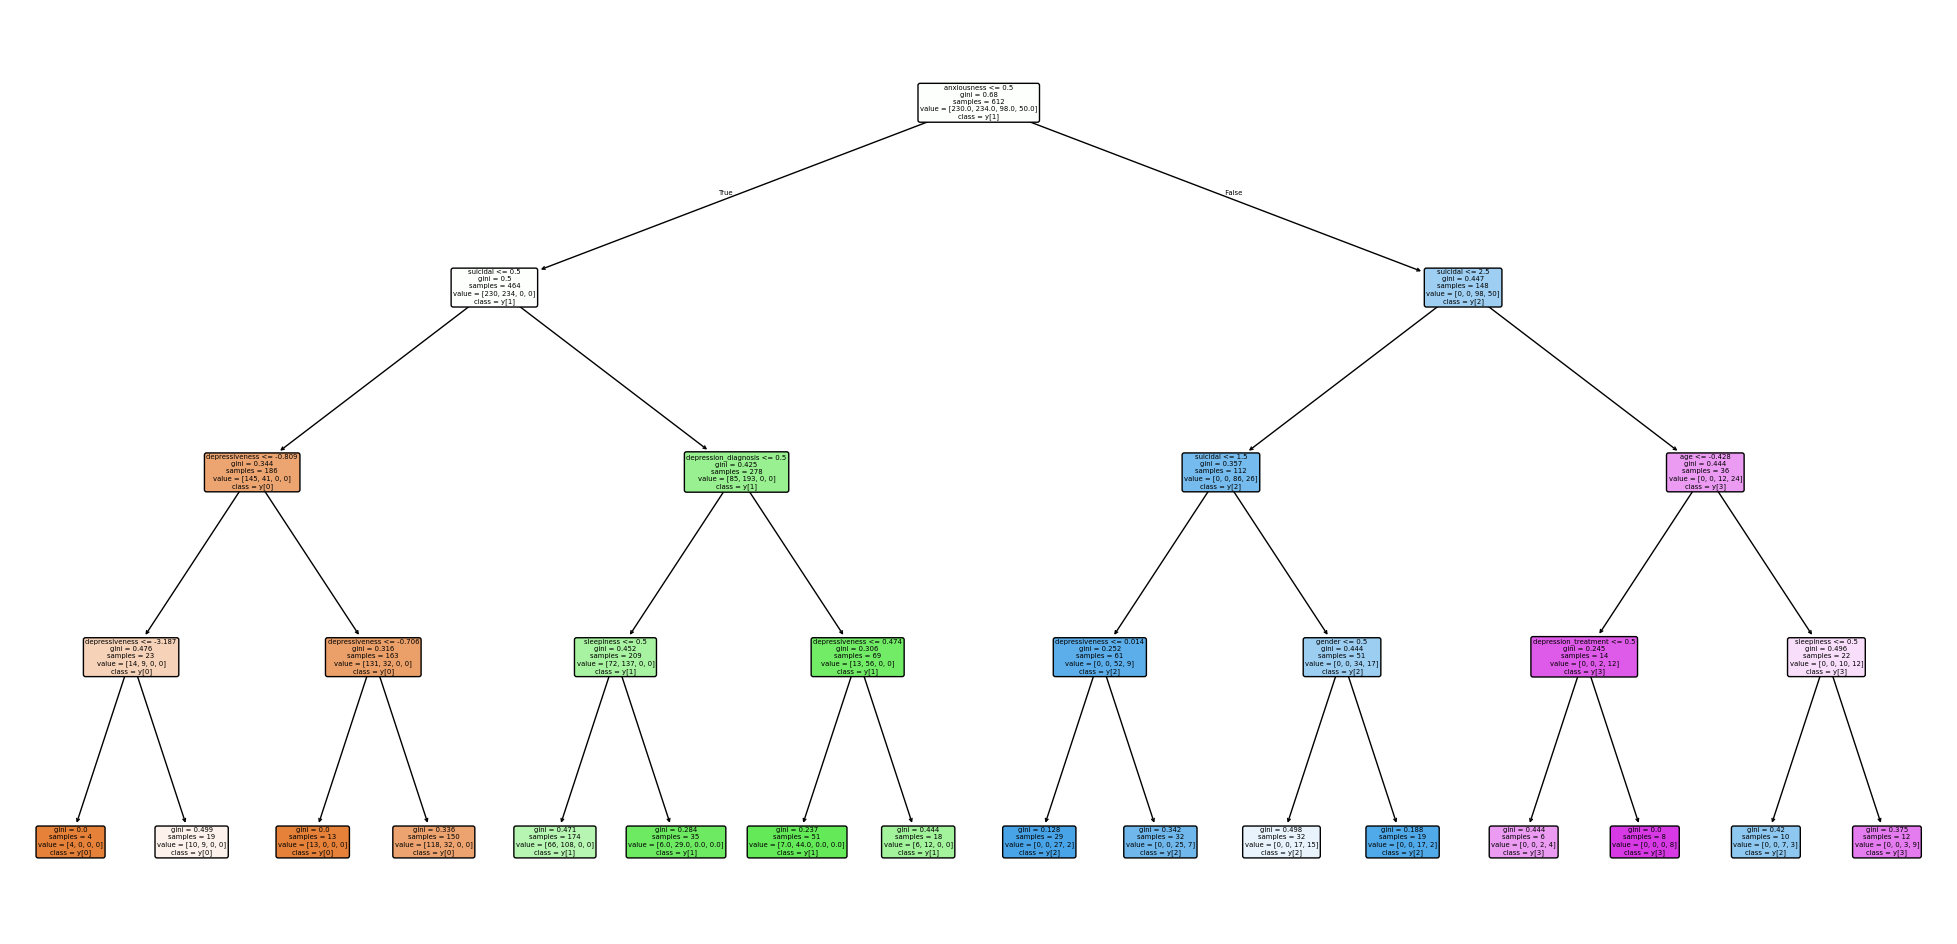

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(anxiety_df.drop('anxiety_severity', axis=1), anxiety_df['anxiety_severity'], test_size=0.2)


model_axiety = DecisionTreeClassifier(max_depth=4)
model_axiety.fit(X_train, y_train)

plt.figure(figsize=(25, 12))
plot_tree(
    model_axiety,
    feature_names=X.columns,
    class_names=True,
    filled=True,
    rounded=True
)
plt.show()


Accuracy: 0.6209

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52        52
           1       0.60      0.68      0.63        59
           2       0.72      0.88      0.79        26
           3       0.70      0.44      0.54        16

    accuracy                           0.62       153
   macro avg       0.65      0.62      0.62       153
weighted avg       0.62      0.62      0.61       153



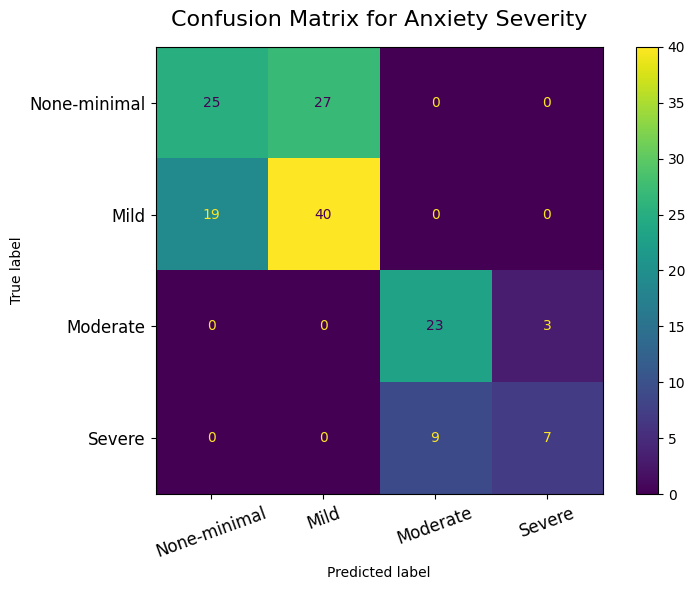

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay


y_pred = model_axiety.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "None-minimal", "Mild", "Moderate", "Severe"
])
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Anxiety Severity", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

dt_model_anxiety = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_model_anxiety,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

dt_model_anxiety = grid_search.best_estimator_
print("Model updated with the best hyperparameters from Grid Search.")

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best Parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Best Cross-validation Accuracy: 0.7287
Model updated with the best hyperparameters from Grid Search.


Accuracy of Optimized DT: 0.6209

Classification Report for DT:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52        52
           1       0.60      0.68      0.63        59
           2       0.72      0.88      0.79        26
           3       0.70      0.44      0.54        16

    accuracy                           0.62       153
   macro avg       0.65      0.62      0.62       153
weighted avg       0.62      0.62      0.61       153



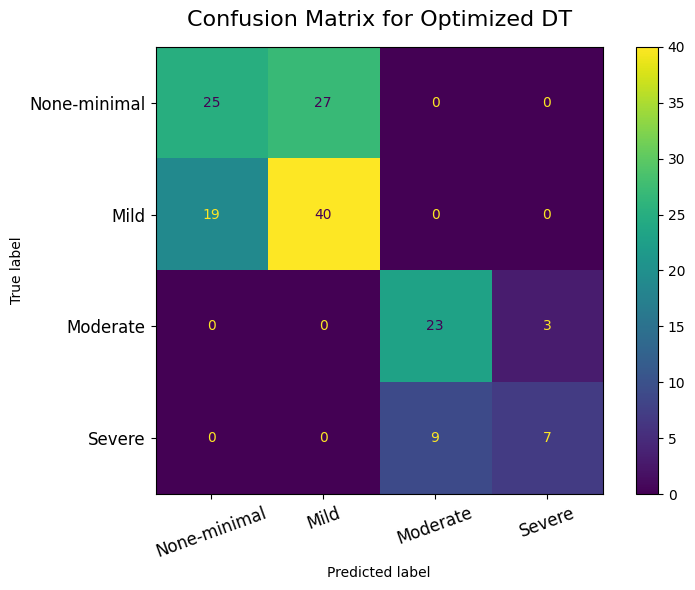

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_optimized = dt_model_anxiety.predict(X_test)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy of Optimized DT: {accuracy_optimized:.4f}")

print("\nClassification Report for DT:")
print(classification_report(y_test, y_pred_optimized))

class_labels = ["None-minimal", "Mild", "Moderate", "Severe"]

cm_optimized = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Optimized DT", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


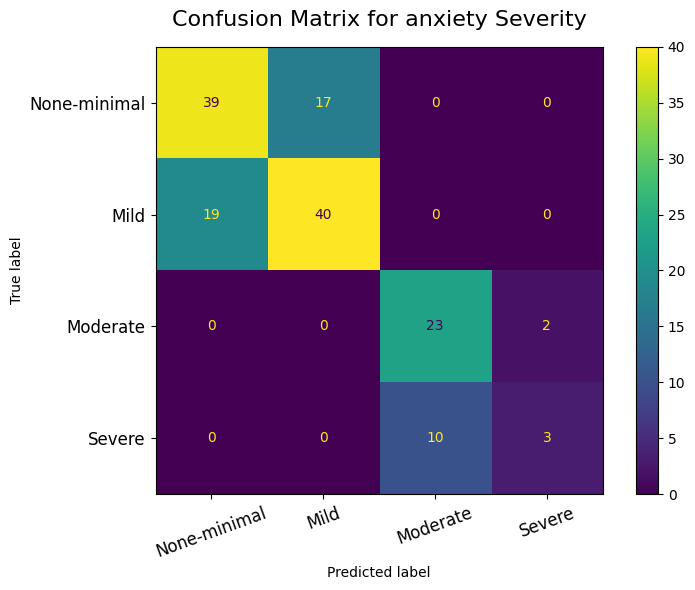

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


X = anxiety_df.drop(columns=["anxiety_severity"])
y = anxiety_df["anxiety_severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_multi_anxiety = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
log_multi_anxiety.fit(X_train, y_train)

y_pred = log_multi_anxiety.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # bigger display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "None-minimal", "Mild", "Moderate",  "Severe"
])
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for anxiety Severity", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}

lr_model_anxiety = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=42
)

# Initialize GridSearchCV
grid_search_lr_anxiety = GridSearchCV(
    estimator=lr_model_anxiety,
    param_grid=param_grid_lr,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_lr_anxiety.fit(X_train, y_train)

print(f"Best Parameters found for Logistic Regression: {grid_search_lr_anxiety.best_params_}")
print(f"Best Cross-validation Accuracy for Logistic Regression: {grid_search_lr_anxiety.best_score_:.4f}")

best_lr_model_anxiety = grid_search_lr_anxiety.best_estimator_
print("Logistic Regression model updated with the best hyperparameters from Grid Search.")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters found for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-validation Accuracy for Logistic Regression: 0.6961
Logistic Regression model updated with the best hyperparameters from Grid Search.


C:\Users\aadar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Optimized Logistic Regression: 0.6797

Classification Report for Optimized Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67        56
           1       0.69      0.68      0.68        59
           2       0.70      0.92      0.79        25
           3       0.60      0.23      0.33        13

    accuracy                           0.68       153
   macro avg       0.66      0.63      0.62       153
weighted avg       0.67      0.68      0.67       153



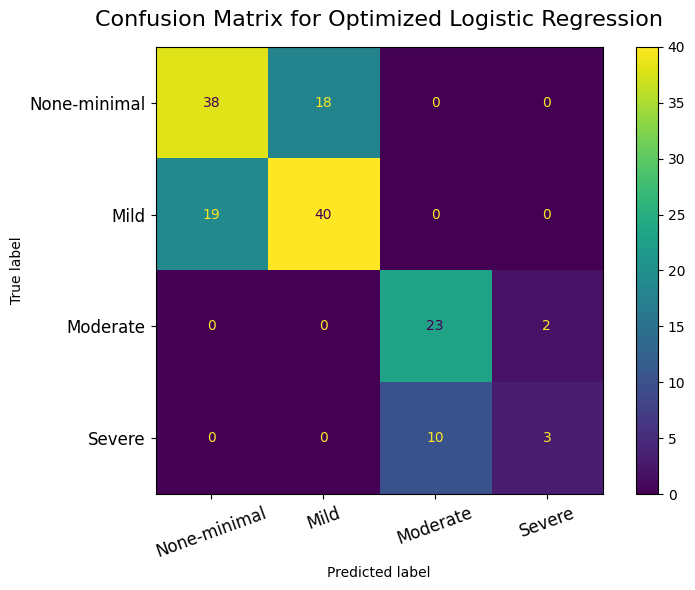

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_optimized = best_lr_model_anxiety.predict(X_test)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy of Optimized Logistic Regression: {accuracy_optimized:.4f}")

print("\nClassification Report for Optimized Logistic Regression:")
print(classification_report(y_test, y_pred_optimized))

class_labels = ["None-minimal", "Mild", "Moderate", "Severe"]

cm_optimized = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Optimized Logistic Regression", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


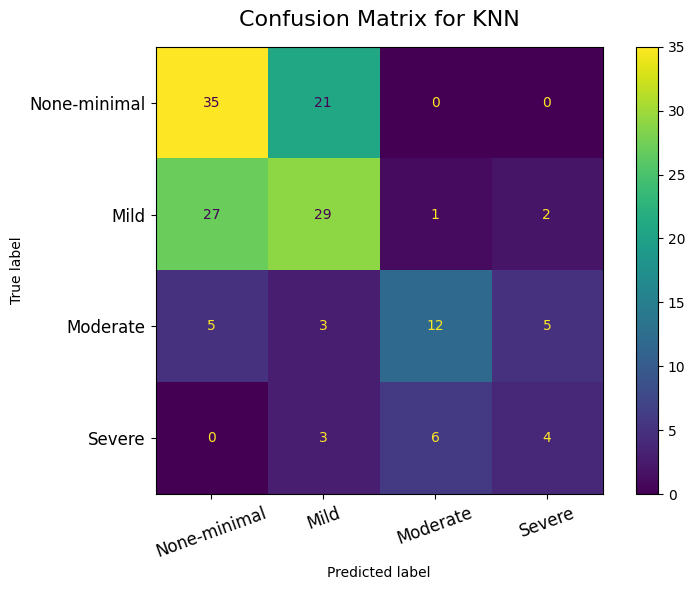

In [53]:
from sklearn.neighbors import KNeighborsClassifier
X = anxiety_df.drop(columns=["anxiety_severity"])
y = anxiety_df["anxiety_severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Knn_model_anxiety=KNeighborsClassifier(
    n_neighbors=3
)
Knn_model_anxiety.fit(X_train, y_train)
y_pred=Knn_model_anxiety.predict(X_test)


cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(ax=plt.gca())
plt.title("Confusion Matrix for KNN", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn_model_anxiety = KNeighborsClassifier()


grid_search_knn_anxiety = GridSearchCV(
    estimator=knn_model_anxiety,
    param_grid=param_grid_knn,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search_knn_anxiety.fit(X_train, y_train)

print(f"Best Parameters found for KNN: {grid_search_knn_anxiety.best_params_}")
print(f"Best Cross-validation Accuracy for KNN: {grid_search_knn_anxiety.best_score_:.4f}")


Knn_model_anxiety = grid_search_knn_anxiety.best_estimator_
print("KNN model updated with the best hyperparameters from Grid Search.")

Fitting 10 folds for each of 42 candidates, totalling 420 fits
Best Parameters found for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-validation Accuracy for KNN: 0.6587
KNN model updated with the best hyperparameters from Grid Search.


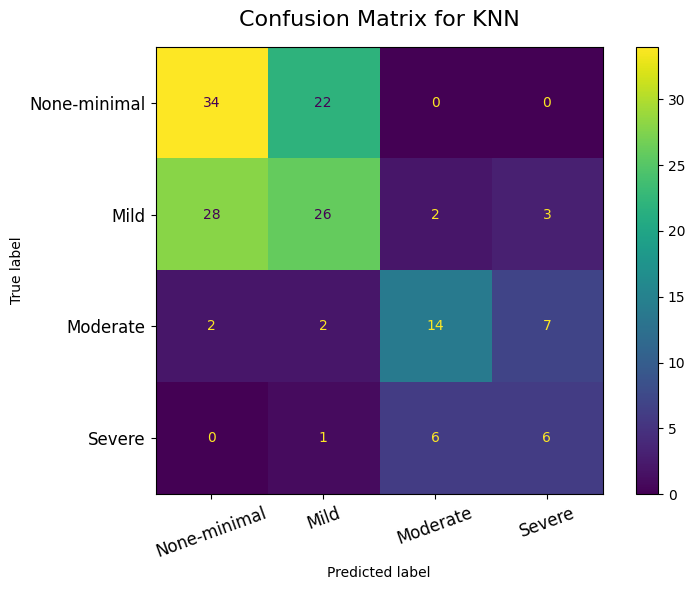

In [55]:
Knn_model_anxiety.fit(X_train, y_train)
y_pred=Knn_model_anxiety.predict(X_test)


cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(ax=plt.gca())
plt.title("Confusion Matrix for KNN", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


base_learners = [
    ("knn", Knn_model_anxiety),
    ("lr", best_lr_model_anxiety),
    ("tree", dt_model_anxiety)
]

meta_model = LogisticRegression(max_iter=1000)


stack_anxiety = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5
)


ovr_stack_anxiety = OneVsRestClassifier(stack)
ovr_stack_anxiety.fit(X_train, y_train)

y_pred = ovr_stack_anxiety.predict(X_test)


In [57]:
from sklearn.model_selection import GridSearchCV

# (Make sure your stacking meta-model is logistic)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# define base learners if not already plugged
base_estimators = [
    ("knn", Knn_model),
    ("dt", model),
    ("lr", best_lr_model)
]

# Ensure final estimator is logistic
stack_anxiety = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=2000, random_state=42),
    n_jobs=-1
)

# Grid space only for meta logistic
param_grid = {
    "final_estimator__C": [0.01, 0.1, 1, 10],
    "final_estimator__solver": ['lbfgs', 'saga']
}

stack_grid_anxiety = GridSearchCV(
    estimator=stack_anxiety,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

stack_grid_anxiety.fit(X_train, y_train)

print("Best params for stack:", stack_grid_anxiety.best_params_)
print("Best CV score:", stack_grid_anxiety.best_score_)

# Best stacked model for later testing
best_stack_anxiety = stack_grid_anxiety.best_estimator_

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params for stack: {'final_estimator__C': 0.1, 'final_estimator__solver': 'saga'}
Best CV score: 0.7156870585099294
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        56
           1       0.65      0.58      0.61        59
           2       0.70      0.92      0.79        25
           3       0.60      0.23      0.33        13

    accuracy                           0.64       153
   macro avg       0.64      0.60      0.59       153
weighted avg       0.64      0.64      0.63       153



Accuracy of Stacked Classifier (OVR): 0.6405

Classification Report for Stacked Classifier (OVR):
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        56
           1       0.65      0.58      0.61        59
           2       0.70      0.92      0.79        25
           3       0.60      0.23      0.33        13

    accuracy                           0.64       153
   macro avg       0.64      0.60      0.59       153
weighted avg       0.64      0.64      0.63       153



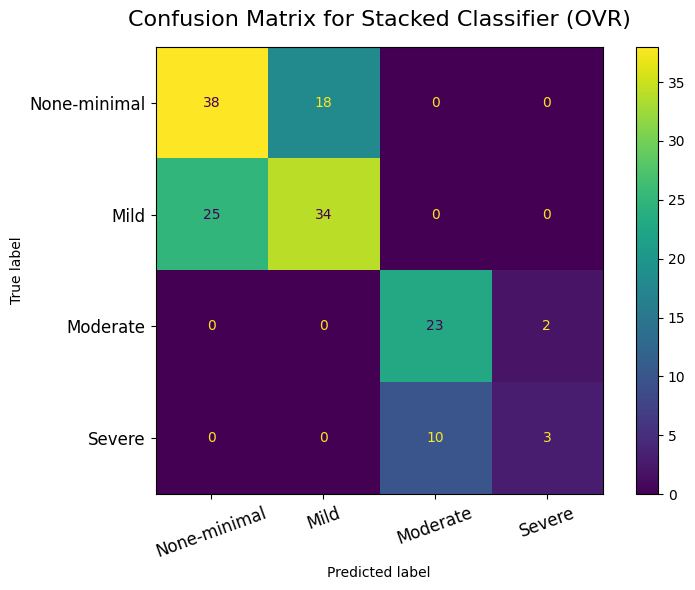

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_stacked = ovr_stack_anxiety.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy of Stacked Classifier (OVR): {accuracy_stacked:.4f}")

print("\nClassification Report for Stacked Classifier (OVR):")
print(classification_report(y_test, y_pred_stacked))


class_labels = ["None-minimal", "Mild", "Moderate", "Severe"]

cm_stacked = confusion_matrix(y_test, y_pred_stacked)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Stacked Classifier (OVR)", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Accuracy of Best Stack: 0.6340

Classification Report for Stacked Classifier (:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63        56
           1       0.64      0.58      0.61        59
           2       0.69      0.96      0.80        25
           3       0.67      0.15      0.25        13

    accuracy                           0.63       153
   macro avg       0.65      0.59      0.57       153
weighted avg       0.63      0.63      0.62       153



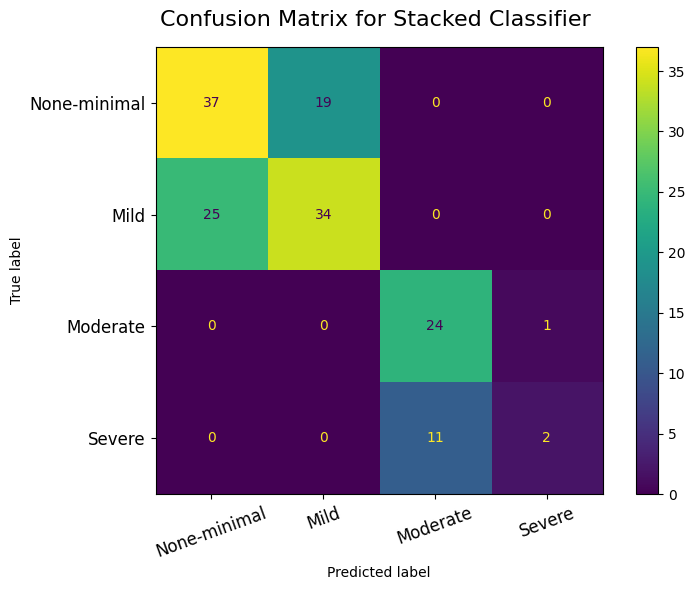

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_stacked = best_stack_anxiety.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy of Best Stack: {accuracy_stacked:.4f}")

print("\nClassification Report for Stacked Classifier (:")
print(classification_report(y_test, y_pred_stacked))


class_labels = ["None-minimal", "Mild", "Moderate", "Severe"]

cm_stacked = confusion_matrix(y_test, y_pred_stacked)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Stacked Classifier ", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Accuracy of Stacked Classifier (OVR): 0.6405

Classification Report for Stacked Classifier (OVR):
              precision    recall  f1-score   support

           0       0.60      0.70      0.64        56
           1       0.66      0.56      0.61        59
           2       0.69      0.96      0.80        25
           3       0.67      0.15      0.25        13

    accuracy                           0.64       153
   macro avg       0.65      0.59      0.58       153
weighted avg       0.64      0.64      0.62       153



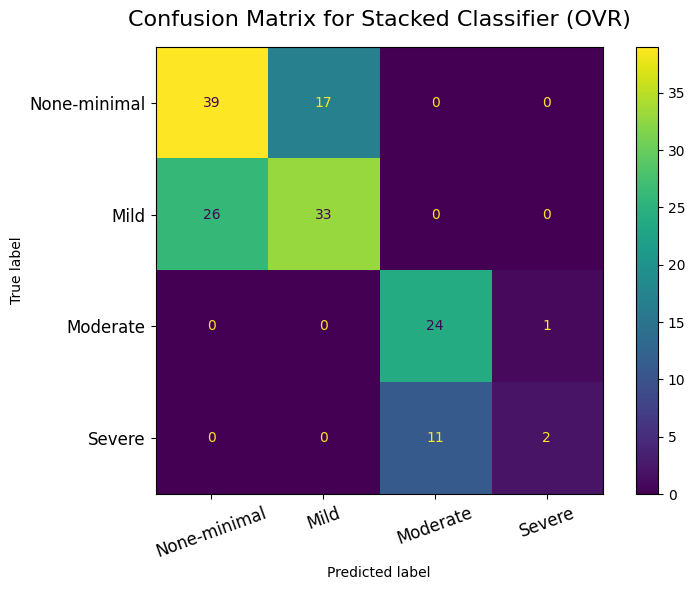

In [60]:
#OVR with Best stack
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ovr_stack_anxiety = OneVsRestClassifier(best_stack_anxiety)
ovr_stack_anxiety.fit(X_train, y_train)



y_pred_stacked = ovr_stack_anxiety.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy of Stacked Classifier (OVR): {accuracy_stacked:.4f}")

print("\nClassification Report for Stacked Classifier (OVR):")
print(classification_report(y_test, y_pred_stacked))


class_labels = ["None-minimal", "Mild", "Moderate", "Severe"]

cm_stacked = confusion_matrix(y_test, y_pred_stacked)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=class_labels)
disp.plot(ax=plt.gca())

plt.title("Confusion Matrix for Stacked Classifier (OVR)", fontsize=16, pad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [61]:
import joblib

# Save the best depression model
joblib.dump(best_stack, 'depression_model.pkl')
print("Depression model saved as depression_model.pkl")

# Save the best anxiety model
joblib.dump(best_stack_anxiety, 'anxiety_model.pkl')
print("Anxiety model saved as anxiety_model.pkl")

Depression model saved as depression_model.pkl
Anxiety model saved as anxiety_model.pkl


In [62]:
import joblib
import os

# Create folder if not exists
os.makedirs("model", exist_ok=True)

# Save age scaler
joblib.dump(st, "model/scaler_age.pkl")

# Save bmi scaler
joblib.dump(b, "model/scaler_bmi.pkl")

print("Scalers saved successfully!")


Scalers saved successfully!


In [63]:
encoders = {
    "gender": gender,
    "suicidal": suicidal,
    "sleepiness": sleepiness,
    "anxiousness": anxiousness,
    "depression_diagnosis": depression_diagnosis,
    "depression_treatment": depression_treatment,
    "anxiety_diagnosis": anxiety_diagnosis,
    "anxiety_treatment": anxiety_treatment
}

joblib.dump(encoders, "model/encoders.pkl")

print("Encoders dictionary saved successfully!")


Encoders dictionary saved successfully!


In [66]:
print(best_stack_anxiety.feature_names_in_)

['school_year' 'age' 'gender' 'bmi' 'depression_severity' 'depressiveness'
 'suicidal' 'depression_treatment' 'anxiousness' 'anxiety_diagnosis'
 'anxiety_treatment' 'sleepiness']
